# Overview

The loan approval dataset is a collection of financial records and associated information used to determine the eligibility of individuals or organizations for obtaining loans from a lending institution




In [102]:
# EDA tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix





# Styling
sns.set_style("whitegrid")


Load data

In [2]:
df = pd.read_csv("data/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [4]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [5]:
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

**Data Dictionary**

`load id` - Loan ID identifier

`no_of_dependents` - Number of dependents of the applicant

`education` - Applicants highest education level

`self_employed` - Employment status of the applicant

`income_annum` - Annual income of the applicant

`loan_amount` - Loan amount ($)

`loan_term` - Length of desired loan (years)

`cibil_score` - Credit score

`residential_assets_value` - 

`commercial_assets_value`

`luxury_assets_value`

`bank_asset_value`

`loan_status` - Approved (1) or rejected (0) 

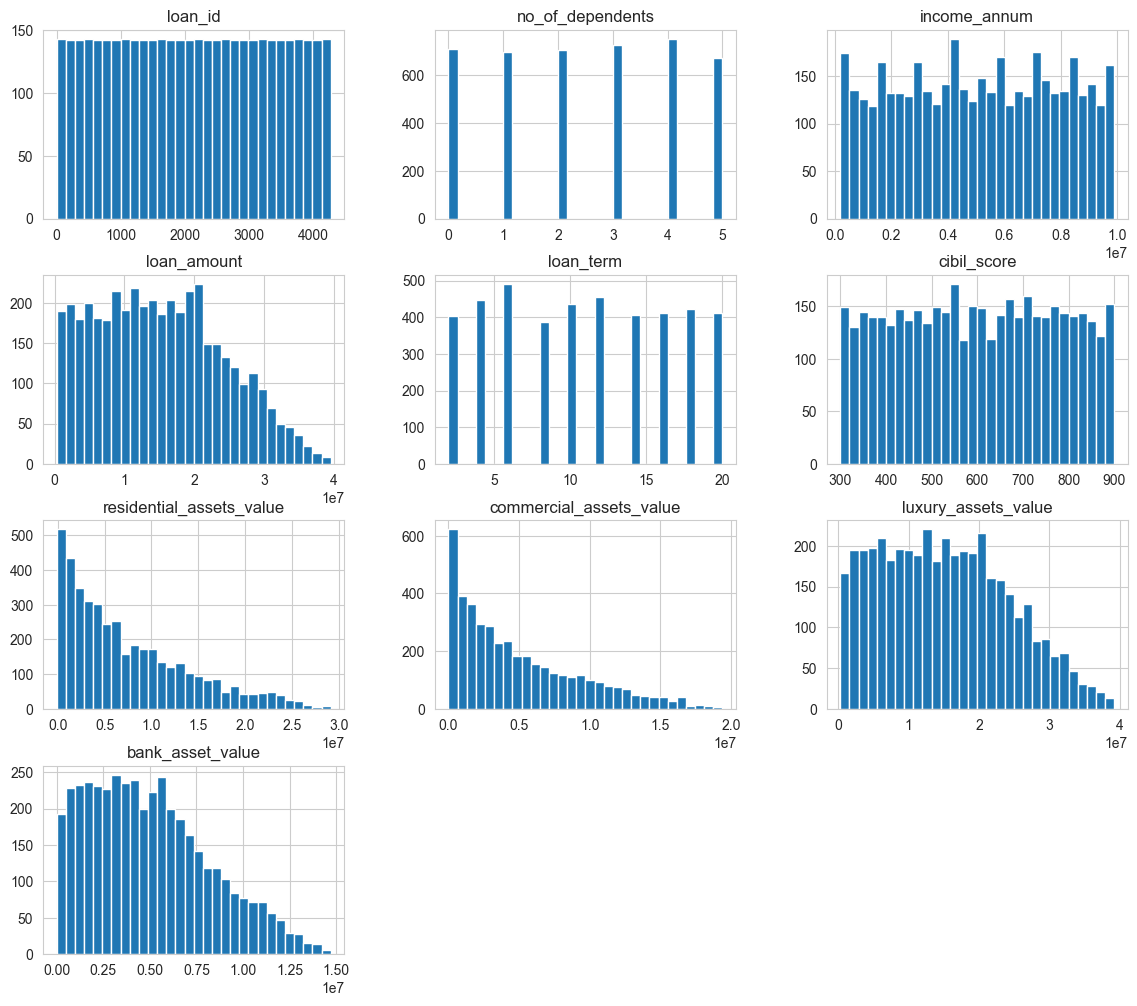

In [6]:
## Quick overview of numerical data

df.hist(bins=30, figsize=(14,12))
plt.show()

In [7]:
## Summary statistics

df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Univariate Analysis

This section will explore each individual column to get a high-level understanding of the data and its distribution

In [8]:
def plot_cont_dist(df, column:str, title:str, xlabel:str, ylabel:str):
    """_summary_

    Args:
        df (pd.DataFrame): _description_
        column (str): _description_
        title (str): _description_
        xlabel (str): _description_
        ylabel (str): _description_
    """

    print(df[column].describe())

    fig, (ax_box, ax_hist) = plt.subplots(nrows=2,
                                          sharex=True,
                                          figsize=(6,4),
                                          gridspec_kw={"height_ratios": (.15, .85)})
    
    sns.boxplot(df[column], ax=ax_box, orient="h", color="salmon")
    sns.histplot(df[column], bins=30, ax=ax_hist, kde=True, color="steelblue")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)



**1. Income_annum**

In [9]:
df["income_annum"].tail()

4264    1000000
4265    3300000
4266    6500000
4267    4100000
4268    9200000
Name: income_annum, dtype: int64

In [10]:
## Refactoring income_annum
df["income_annum"] = df["income_annum"]/1000

In [11]:
df["income_annum"].tail()

4264    1000.0
4265    3300.0
4266    6500.0
4267    4100.0
4268    9200.0
Name: income_annum, dtype: float64

In [12]:
df.income_annum.min()

200.0

count    4269.000000
mean     5059.123917
std      2806.839832
min       200.000000
25%      2700.000000
50%      5100.000000
75%      7500.000000
max      9900.000000
Name: income_annum, dtype: float64


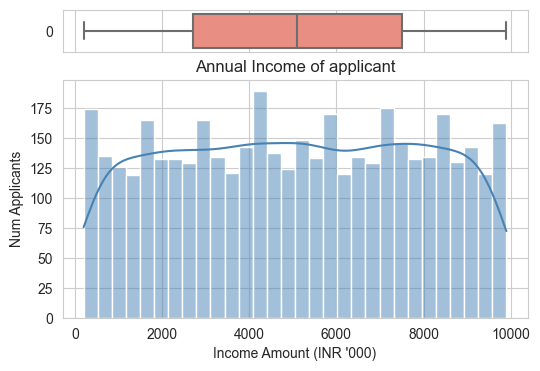

In [13]:
plot_cont_dist(df, column="income_annum", 
               title="Annual Income of applicant",
               xlabel="Income Amount (INR '000)",
               ylabel="Num Applicants")

We see that from this dataset, the average annual income of an applicant is around INR 5,000,000 with the majority of applicants income ranging between INR2.7m and 7.5m. The data does not follow a continuous distribution as was to be expected but closely resembles a continuious uniform distribution.


**Loan_amount**

In [14]:
df["loan_amount"].head()

0    29900000
1    12200000
2    29700000
3    30700000
4    24200000
Name: loan_amount, dtype: int64

In [15]:
## Refactoring income_annum
df["loan_amount"] = df["loan_amount"]/10000

count    4269.000000
mean     1513.345046
std       904.336298
min        30.000000
25%       770.000000
50%      1450.000000
75%      2150.000000
max      3950.000000
Name: loan_amount, dtype: float64


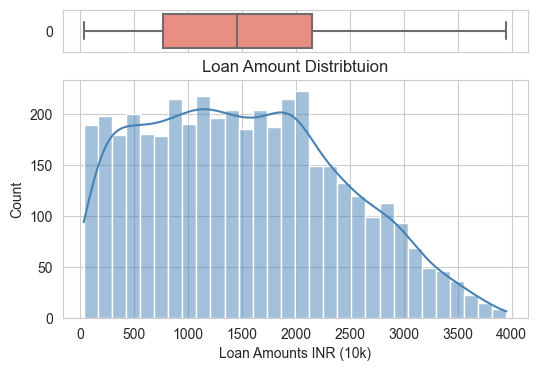

In [16]:
plot_cont_dist(df, column="loan_amount", 
               title="Loan Amount Distribtuion",
               xlabel="Loan Amounts INR (10k)",
               ylabel="Count")

From the distribution above, we see that the average loan amount was 15,130,000 or INR 15.1m with majority of the loan_amounts ranging between INR 7.7m and INR 14.5m.

**Cibil Score**

count    4269.000000
mean      599.936051
std       172.430401
min       300.000000
25%       453.000000
50%       600.000000
75%       748.000000
max       900.000000
Name: cibil_score, dtype: float64


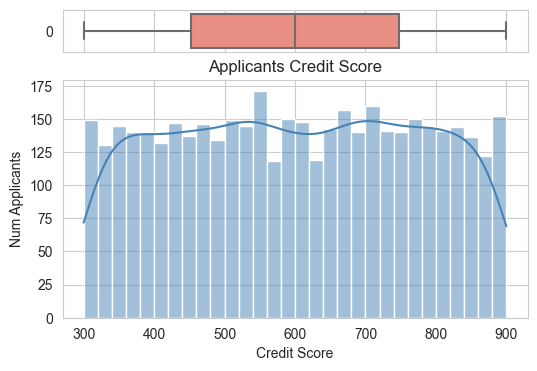

In [17]:
plot_cont_dist(df, column="cibil_score",
               title="Applicants Credit Score",
               xlabel="Credit Score",
               ylabel="Num Applicants")

![Cibil credit score](./images_others/Screenshot%202023-08-10%20at%2013.15.38.png)

**Residential Assets Value**

In [18]:
df["residential_assets_value"] = df["residential_assets_value"] / 10000
df["residential_assets_value"].head()

0     240.0
1     270.0
2     710.0
3    1820.0
4    1240.0
Name: residential_assets_value, dtype: float64

count    4269.000000
mean      747.261654
std       650.363659
min       -10.000000
25%       220.000000
50%       560.000000
75%      1130.000000
max      2910.000000
Name: residential_assets_value, dtype: float64


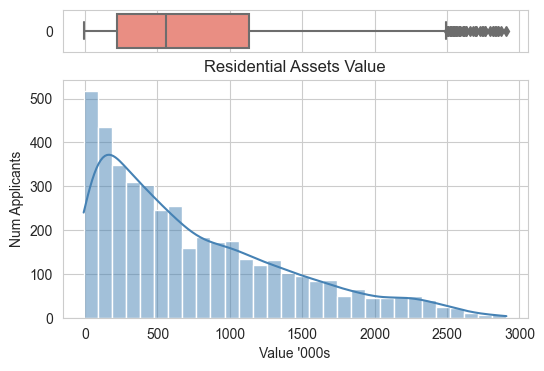

In [19]:
plot_cont_dist(df, column="residential_assets_value",
               title="Residential Assets Value",
               xlabel="Value '000s",
               ylabel="Num Applicants")

The above graph shows the distribution of the residential asset values in which the applicants may have put up as collateral against their loan application. 

While the values seem reasonable, a residential asset with a negative value needs to be investigated further.

**Commercial Assets Value**

In [20]:
df.commercial_assets_value = df.commercial_assets_value / 1000
df.commercial_assets_value.head()

0    17600.0
1     2200.0
2     4500.0
3     3300.0
4     8200.0
Name: commercial_assets_value, dtype: float64

count     4269.000000
mean      4973.155306
std       4388.966090
min          0.000000
25%       1300.000000
50%       3700.000000
75%       7600.000000
max      19400.000000
Name: commercial_assets_value, dtype: float64


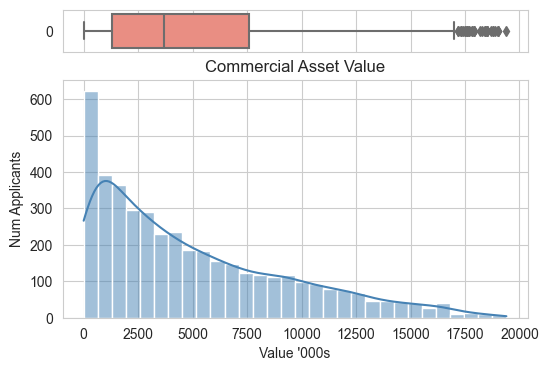

In [21]:
plot_cont_dist(df, column="commercial_assets_value",
               title="Commercial Asset Value",
               xlabel="Value '000s",
               ylabel="Num Applicants")

Looking at the number of commercial assets put up for collateral, we can assume that all the applicants in this dataset own commercial assets. The distribution shows a long right tail which is realistic as fewer and fewer people will own really expensive commercial assets.

**Luxury Assets Value**

In [22]:
df.luxury_assets_value = df.luxury_assets_value / 1000

count     4269.000000
mean     15126.305926
std       9103.753665
min        300.000000
25%       7500.000000
50%      14600.000000
75%      21700.000000
max      39200.000000
Name: luxury_assets_value, dtype: float64


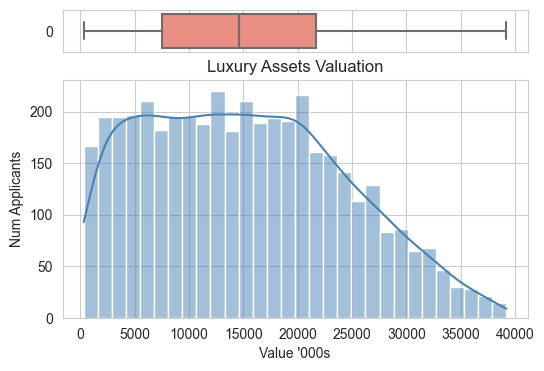

In [23]:
plot_cont_dist(df, column="luxury_assets_value", 
               title="Luxury Assets Valuation",
               xlabel="Value '000s",
               ylabel="Num Applicants")

The distribution above shows that most applicants have luxury assets valued between INR 7.5m and INR 21.7m. 

**Bank Asset Value**

In [24]:
df.bank_asset_value = df.bank_asset_value / 1000

count     4269.000000
mean      4976.692434
std       3250.185306
min          0.000000
25%       2300.000000
50%       4600.000000
75%       7100.000000
max      14700.000000
Name: bank_asset_value, dtype: float64


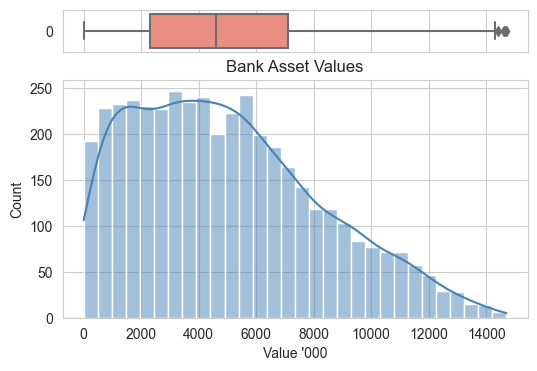

In [25]:
plot_cont_dist(df, column="bank_asset_value",
               title="Bank Asset Values",
               xlabel="Value '000",
               ylabel="Count")

The distribution shows the total assets a bank own where each applicant lodged their loan application. Most bank assets are valued between 2.3m and 7.1m.

**No. of dependents**

count    4269.000000
mean        2.498712
std         1.695910
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: no_of_dependents, dtype: float64


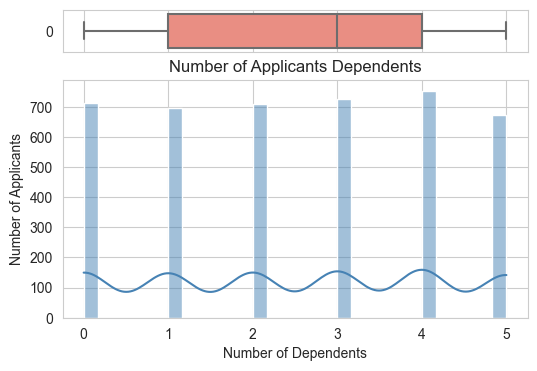

In [26]:
plot_cont_dist(df, column="no_of_dependents", 
               title="Number of Applicants Dependents", 
               xlabel="Number of Dependents", 
               ylabel="Number of Applicants")

count    4269.000000
mean       10.900445
std         5.709187
min         2.000000
25%         6.000000
50%        10.000000
75%        16.000000
max        20.000000
Name: loan_term, dtype: float64


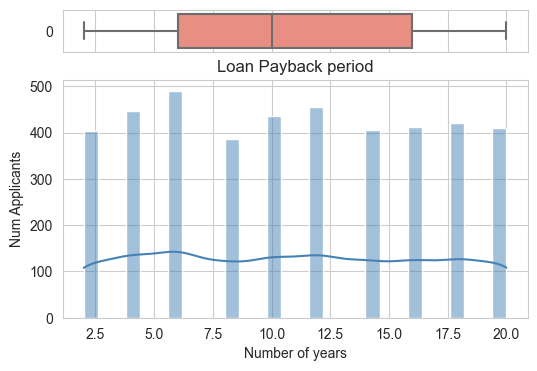

In [27]:
plot_cont_dist(df, column="loan_term",
               title="Loan Payback period",
               xlabel="Number of years",
               ylabel="Num Applicants")

From the distribution above, we see that most of the loans requested in India have a payback period of  between 6 and 16 years with few loans having a payback period of either 2.5 years and 20 years.

### Bivariate Analysis

The following section will compare columns of interest together in order to derive additional insights.

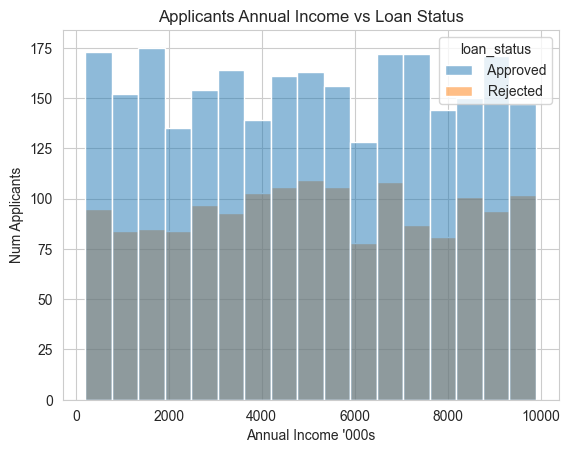

In [28]:
sns.histplot(df, x="income_annum", hue="loan_status");
plt.title("Applicants Annual Income vs Loan Status")
plt.xlabel("Annual Income '000s")
plt.ylabel("Num Applicants");

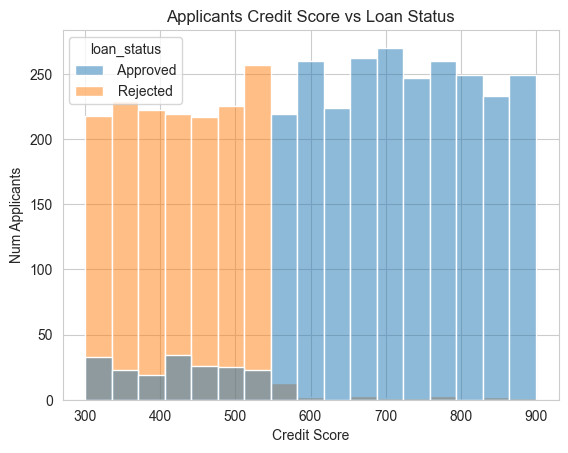

In [29]:
sns.histplot(df, x="cibil_score", hue="loan_status");
plt.title("Applicants Credit Score vs Loan Status")
plt.xlabel("Credit Score")
plt.ylabel("Num Applicants");

Looking at the distribution above and our previous analysis of the CIBIL credit score.

From the distribution above we see that an applicant with a credit score of greater than approximately 550 had a high probability of their loan being approved. However, this differs from our own analysis showing that a credit scores < 600 had a low probability of getting their loan approved.

In [30]:
## Proportion of credit score < 650
len(df[df["cibil_score"] < 650]) / len(df["cibil_score"])

0.5781213398922465

Based of CIBIL's website, we see that the average probability of an applicant with a credit score < 650 getting their loan approved is 4.7% but our data shows that 57.8% of applicants have a credit score < 650.

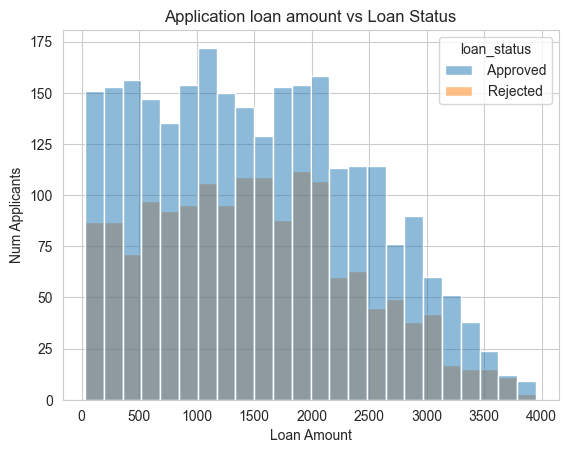

In [31]:
sns.histplot(df, x="loan_amount", hue="loan_status");
plt.title("Application loan amount vs Loan Status")
plt.xlabel("Loan Amount")
plt.ylabel("Num Applicants");

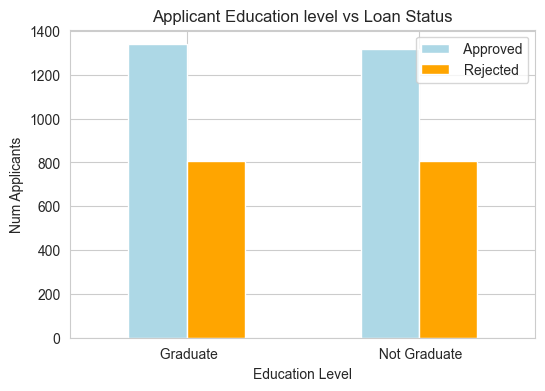

In [32]:
pd.crosstab(df["education"], df["loan_status"]).plot(kind="bar",
                                                     figsize=(6,4),
                                                     color=["lightblue", "orange"])
plt.title("Applicant Education level vs Loan Status")
plt.xlabel("Education Level")
plt.ylabel("Num Applicants")
plt.xticks(rotation=0)
plt.legend(loc="upper right");

Based of the visualization above, we can make an assumption that an applicants education level has little to no effect on their loan approval status.

## Data Processing

This section involves:
- Select data
- Clean data
- Construct data
- Integrate data
- Format data

**Selecting data**

This involves selecting the most important data for our analysis

In [33]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600.0,2990.0,12,778,240.0,17600.0,22700.0,8000.0,Approved
1,2,0,Not Graduate,Yes,4100.0,1220.0,8,417,270.0,2200.0,8800.0,3300.0,Rejected
2,3,3,Graduate,No,9100.0,2970.0,20,506,710.0,4500.0,33300.0,12800.0,Rejected
3,4,3,Graduate,No,8200.0,3070.0,8,467,1820.0,3300.0,23300.0,7900.0,Rejected
4,5,5,Not Graduate,Yes,9800.0,2420.0,20,382,1240.0,8200.0,29400.0,5000.0,Rejected


In [34]:
print("Unique values")
print(df["loan_id"].nunique())
print()
print("Length of dataframe")
print(len(df))

Unique values
4269

Length of dataframe
4269


We can see that there are no duplicate ids in the dataframe. Therefore, we can go ahead and drop the column and use the default assigned indexes

In [35]:
df.drop("loan_id", axis=1, inplace=True)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600.0,2990.0,12,778,240.0,17600.0,22700.0,8000.0,Approved
1,0,Not Graduate,Yes,4100.0,1220.0,8,417,270.0,2200.0,8800.0,3300.0,Rejected
2,3,Graduate,No,9100.0,2970.0,20,506,710.0,4500.0,33300.0,12800.0,Rejected
3,3,Graduate,No,8200.0,3070.0,8,467,1820.0,3300.0,23300.0,7900.0,Rejected
4,5,Not Graduate,Yes,9800.0,2420.0,20,382,1240.0,8200.0,29400.0,5000.0,Rejected


In [36]:
## Checking for NA values

df.isna().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

Analyzing residential_assets_value as the minimum value was a negative value.

In [37]:
df["residential_assets_value"].describe()

count    4269.000000
mean      747.261654
std       650.363659
min       -10.000000
25%       220.000000
50%       560.000000
75%      1130.000000
max      2910.000000
Name: residential_assets_value, dtype: float64

In [38]:
df[df["residential_assets_value"] <0]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
59,4,Not Graduate,Yes,5500.0,1820.0,16,797,-10.0,4900.0,18600.0,4800.0,Approved
196,4,Not Graduate,Yes,400.0,150.0,2,669,-10.0,600.0,900.0,500.0,Approved
559,2,Graduate,Yes,200.0,50.0,6,885,-10.0,0.0,300.0,200.0,Rejected
702,4,Graduate,Yes,6300.0,2390.0,6,899,-10.0,11400.0,20600.0,6700.0,Approved
737,2,Graduate,Yes,900.0,250.0,16,458,-10.0,100.0,3200.0,1100.0,Rejected
784,0,Graduate,No,5000.0,1440.0,2,761,-10.0,7300.0,12600.0,4500.0,Approved
904,2,Graduate,No,4100.0,1490.0,12,571,-10.0,5200.0,13000.0,3400.0,Approved
1089,3,Graduate,No,5100.0,1100.0,6,336,-10.0,5800.0,11600.0,7500.0,Rejected
1163,2,Graduate,No,4500.0,910.0,18,593,-10.0,600.0,12400.0,2500.0,Approved
1350,5,Graduate,No,4000.0,1370.0,6,496,-10.0,1400.0,15800.0,3700.0,Rejected


In [39]:
print(len(df[df["residential_assets_value"] <0]))

28


After looking through the negative residential_assets_value and more columns it does not make sense for someone to own a residential asset with a negative value and can assume it was an error during data entry.

This project will aim to keep those columns and remove the negative sign.

In [40]:
## Getting the absolute values 
df["residential_assets_value"] = abs(df["residential_assets_value"])
df[df["residential_assets_value"]<0]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


### Format Data

**Converting Categorical Columns to Numbers**

In [41]:
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [42]:
for labels, content in df.items():
    if pd.api.types.is_object_dtype(content):
        print(labels)

education
self_employed
loan_status


**Education**

In [43]:
df["education"].value_counts()

education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64

In [48]:
df["education"] = pd.get_dummies(df["education"], drop_first=True).astype(int)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,No,9600.0,2990.0,12,778,240.0,17600.0,22700.0,8000.0,Approved
1,0,1,Yes,4100.0,1220.0,8,417,270.0,2200.0,8800.0,3300.0,Rejected
2,3,0,No,9100.0,2970.0,20,506,710.0,4500.0,33300.0,12800.0,Rejected
3,3,0,No,8200.0,3070.0,8,467,1820.0,3300.0,23300.0,7900.0,Rejected
4,5,1,Yes,9800.0,2420.0,20,382,1240.0,8200.0,29400.0,5000.0,Rejected


**Education Level**
- Graduate -> 0
- Not Graduate -> 1

**Self_employed**

In [49]:
df["self_employed"].value_counts()

self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64

In [52]:
df["self_employed"] = pd.get_dummies(df["self_employed"], drop_first=True).astype(int)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600.0,2990.0,12,778,240.0,17600.0,22700.0,8000.0,Approved
1,0,1,1,4100.0,1220.0,8,417,270.0,2200.0,8800.0,3300.0,Rejected
2,3,0,0,9100.0,2970.0,20,506,710.0,4500.0,33300.0,12800.0,Rejected
3,3,0,0,8200.0,3070.0,8,467,1820.0,3300.0,23300.0,7900.0,Rejected
4,5,1,1,9800.0,2420.0,20,382,1240.0,8200.0,29400.0,5000.0,Rejected


**self_employed**

- Yes -> 1 
- No  -> 0

**Loan Status**

In [56]:
df["loan_status"] = pd.get_dummies(df["loan_status"], drop_first=True).astype(int)
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600.0,2990.0,12,778,240.0,17600.0,22700.0,8000.0,0
1,0,1,1,4100.0,1220.0,8,417,270.0,2200.0,8800.0,3300.0,1
2,3,0,0,9100.0,2970.0,20,506,710.0,4500.0,33300.0,12800.0,1
3,3,0,0,8200.0,3070.0,8,467,1820.0,3300.0,23300.0,7900.0,1
4,5,1,1,9800.0,2420.0,20,382,1240.0,8200.0,29400.0,5000.0,1


**Loan status:**

- Approved -> 0
- Rejected -> 1

## Modelling

In this phase, we’ll likely build and assess various models based on several different modeling techniques. This phase has four tasks:

- Correlation Matrix
- Select Modeling Techniques
- Generate Test Design
- Build Models
- Assess Models


**Correlation Matrix**
We'll build a correlation matrix to determine which columns from our dataset to remove as their correlation is >= 0.6

In [98]:
# drop target variable

X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [76]:
X.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,0,0,9600.0,2990.0,12,778,240.0,17600.0,22700.0,8000.0
1,0,1,1,4100.0,1220.0,8,417,270.0,2200.0,8800.0,3300.0
2,3,0,0,9100.0,2970.0,20,506,710.0,4500.0,33300.0,12800.0
3,3,0,0,8200.0,3070.0,8,467,1820.0,3300.0,23300.0,7900.0
4,5,1,1,9800.0,2420.0,20,382,1240.0,8200.0,29400.0,5000.0


In [96]:
def corr_matrix(X:pd.DataFrame):
    """
    This function plots a correlation matrix of a dataframe

    Args:
        X (pd.DataFrame): Dataframe containing column labels excluding target feature
    """

    fig, ax = plt.subplots(figsize=(12, 8))
    
    corr_matrix = X.corr()

    # Mask to hide the upper values of the corr matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    ## Heatmap to visualize correlation
    sns.heatmap(corr_matrix, 
                vmin=-1,
                vmax=1,
                cmap="YlGnBu",
                annot=True,
                mask=mask,
                fmt=".3f");


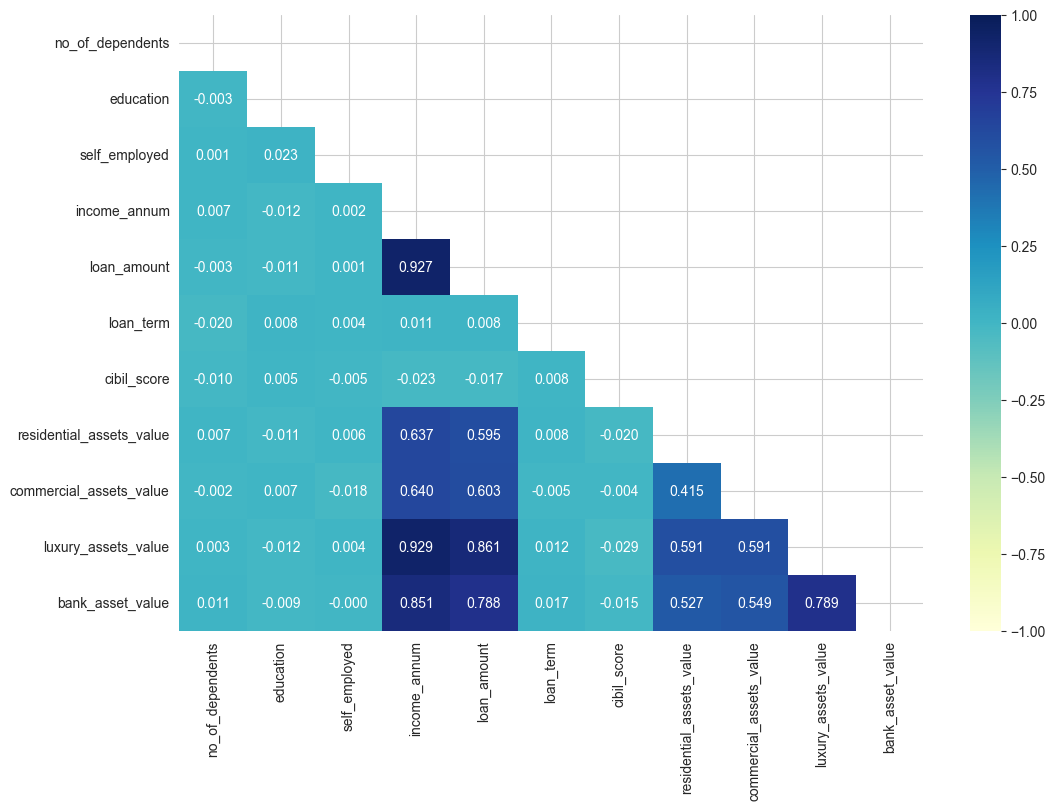

In [93]:
corr_matrix(X)

As we'll be working with a random forest ensemble, it would be okay to leave the highly correlated features. However, removing them may help reduce noise when training the model as well as speed up the training time of the model.

Therefore, for this analysis, I'll remove some of the highly correlated values

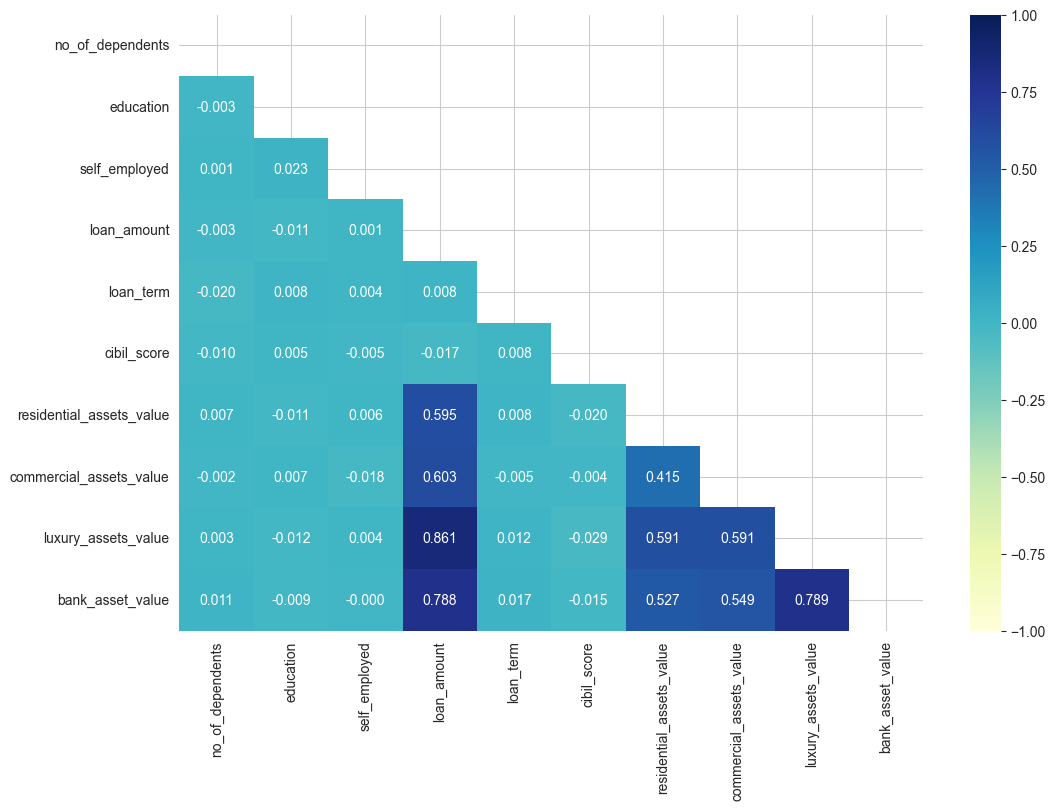

In [99]:
X.drop("income_annum", axis=1, inplace=True)
corr_matrix(X)

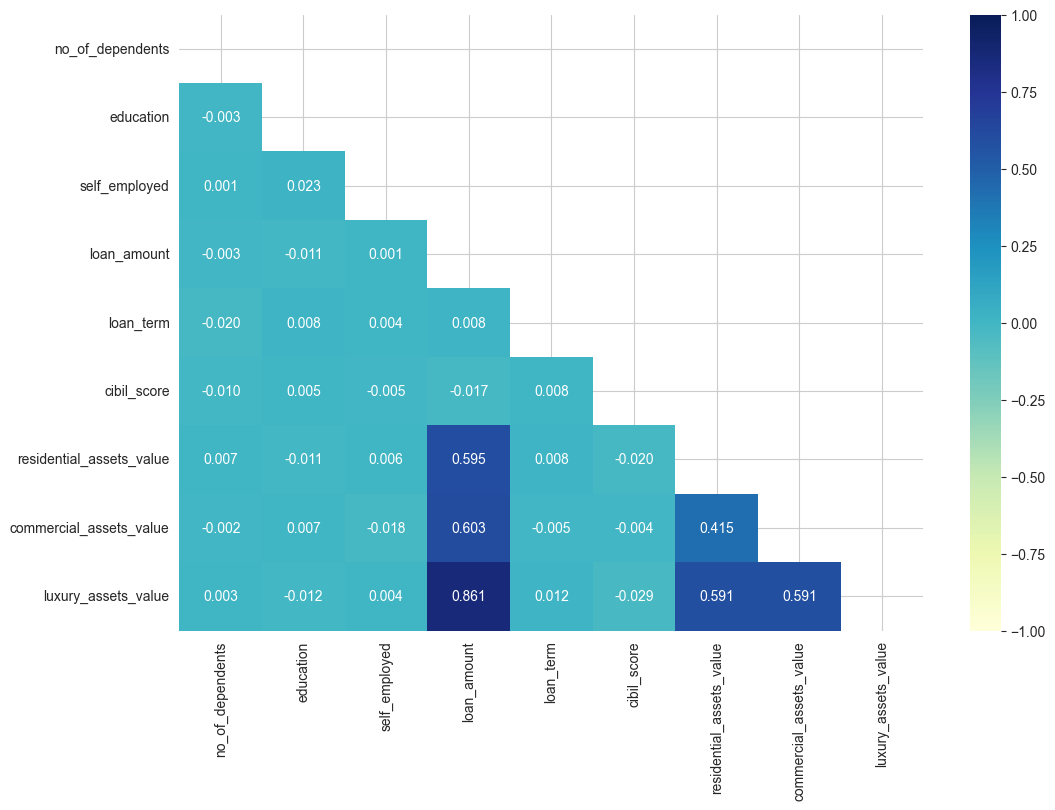

In [100]:
X.drop("bank_asset_value", axis=1, inplace=True)
corr_matrix(X)

After dropping both the `income_annum` and `bank_asset_value`, we've reduced the correlation between values in our plot. We will continue with our analysis without dropping anymore as keeping the above features will help provide greater insights than when removed.

### Building Model

In [103]:
## Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.head()

,no_of_dependents,education,self_employed,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value
1675,5,1,0,2990.0,6,568,580.0,13900.0,15900.0
1164,0,1,1,3400.0,12,710,2380.0,10300.0,38100.0
192,1,0,0,290.0,8,682,220.0,1100.0,2900.0
910,2,0,1,1310.0,18,754,820.0,3300.0,16500.0
567,5,0,1,1110.0,12,441,850.0,2500.0,7300.0


In [104]:
np.random.seed(1234)
## Instantiate clf
clf = RandomForestClassifier()

## Fit clf
clf.fit(X_train, y_train)

## Score clf
clf.score(X_test, y_test)

0.9754098360655737